In [ ]:
!pip install medpy

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

import skimage
import medpy.filter.smoothing as smoothing

/usr/local/lib/python3.7/dist-packages/medpy/filter/smoothing.py:155: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  deltas[i][slicer] = numpy.diff(out, axis=i)
/usr/local/lib/python3.7/dist-packages/medpy/filter/smoothing.py:164: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  matrices[i][slicer] = numpy.diff(matrices[i], axis=i)


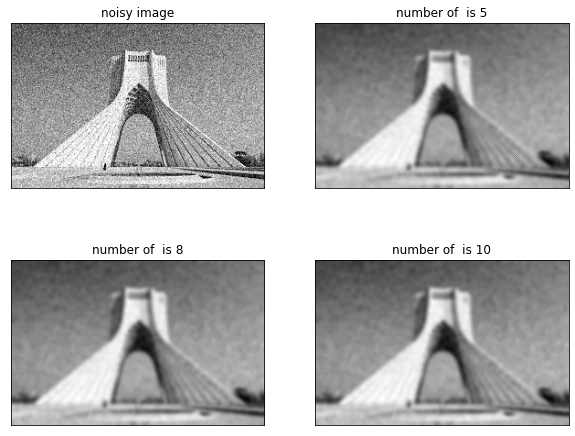

In [19]:
img = cv2.imread("azadi_tower.jpg", cv2.IMREAD_GRAYSCALE)
imgd = cv2.normalize(img.astype('float'), None, 0.0, 1.0, cv2.NORM_MINMAX)
# Apply gaussian noise
imgd = skimage.util.random_noise(img, mode='gaussian', mean=0.0 ,var=0.01)
noisy_img = imgd.copy()

method = 'pm2'
N = 8
K = 5
Deltat = 0.25
sigma = 0.1
Sy, Sx = imgd.shape

if(sigma>0):
  imgd = cv2.GaussianBlur(imgd, (3,3), sigma, cv2.BORDER_REPLICATE)

diffused_img_5 = smoothing.anisotropic_diffusion(img=imgd, niter=8, kappa=5, gamma=0.25,voxelspacing=(1.0,1.0),option=1 )
diffused_img_8 = smoothing.anisotropic_diffusion(img=imgd, niter=8, kappa=8, gamma=0.25,voxelspacing=(1.0,1.0),option=1 )
diffused_img_10 = smoothing.anisotropic_diffusion(img=imgd, niter=8, kappa=10, gamma=0.25,voxelspacing=(1.0,1.0),option=1 )

fig, axes= plt.subplots(2, 2, figsize=(10, 8))
axes[0,0].imshow(noisy_img, cmap='gray')
axes[0,0].set_title('noisy image')

axes[0,1].imshow(diffused_img_5, cmap='gray')
axes[0,1].set_title('number of  is {}'.format(5))

axes[1,0].imshow(diffused_img_8, cmap='gray')
axes[1,0].set_title('number of  is {}'.format(8))

axes[1,1].imshow(diffused_img_10, cmap='gray')
axes[1,1].set_title('number of  is {}'.format(10))

for ax in axes.ravel():
    ax.set_xticks([])
    ax.set_yticks([])


plt.show()

cv2.waitKey(0)
cv2.destroyAllWindows()
